<a href="https://colab.research.google.com/github/taixhi/ait-2023-deeplearning/blob/main/TAICHI_AIT_09_Author_classification_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Copyright

<PRE>
Copyright (c) 2023 Bálint Gyires-Tóth - All Rights Reserved
You may use and modify this code for research and development purpuses.
Use this code for educational purposes (self-paced or instructor led) without the permission of the author is prohibited.
</PRE>

# Author classification
The task is to train a 1D CNN or an LSTM that is able to  classify text from two authors. The final model should be able to tell about a text with a given length (e.g. 60 characters) who wrote it. 

Please write the codes according to the following parts:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Python module imports
Import all Python modules that you would need during the Assignment.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

## Data acquisition
Seek a possible dataset, you can use any source, e.g.
* http://www.gutenberg.org/
* https://www.kaggle.com/datasets
* https://paperswithcode.com/datasets
* if you would like to learn Hungarian, than e.g. https://mek.oszk.hu/

You can download the text by hand (e.g. by copy-pasting some parts into txt files) or with Python. 

In [ ]:
with open("/content/drive/MyDrive/09ait/bge_nietzsche.txt", "r") as f:
    author1_text = f.read()
    
with open("/content/drive/MyDrive/09ait/republic.txt", "r") as f:
    author2_text = f.read()


## Data analysis
Count the number of characters from both authors and display them on a plot (e.g. Seaborn's countplot).

In [ ]:
author1_text = author1_text[0:15000]
author2_text = author2_text[0:15000]

In [ ]:
author2_text[1000:1200]

'brother, Niceratus the son\nof Nicias, and several others who had been at the procession.\n\nPolemarchus said to me: I perceive, Socrates, that you and your\ncompanion are already on your way to the city.'

## Data loading, labeling and preprocessing
Load the data and convert the characters into one-hot encodings. Then load the data into a 3D NumPy array, with a shape of

* (batch, sequence_length, alphabet_length)

where sequence_length=60, and alphabet_length equals to the number of unique characters in both datasets. The sequences should be cut out from the complete dataset by sliding window. You should add 0 and 1 labels to the sequences, according to the author. 

Later you may change sequence_length to achieve better results!

In [ ]:
# Create a character set with unique characters from both datasets
alphabet = sorted(set(author1_text + author2_text))
alphabet_length = len(alphabet)

In [ ]:
def sliding_window(text, window_size, step_size=1):
    return [text[i:i + window_size] for i in range(0, len(text) - window_size, step_size)]
# Create a dictionary to map characters to indices
char_to_index = {c: i for i, c in enumerate(alphabet)}

# Convert the characters into one-hot encodings
sequence_length = 60

author1_sequences = sliding_window(author1_text, sequence_length)
author2_sequences = sliding_window(author2_text, sequence_length)

one_hot_encoded_sequences = []
for seq in author1_sequences + author2_sequences:
    one_hot_encoded_seq = np.zeros((sequence_length, alphabet_length))
    for i, char in enumerate(seq):
        one_hot_encoded_seq[i, char_to_index[char]] = 1
    one_hot_encoded_sequences.append(one_hot_encoded_seq)

# Create a 3D NumPy array with the specified shape
X = np.stack(one_hot_encoded_sequences)

# Assign labels to the sequences according to the author
y = np.array([0] * len(author1_sequences) + [1] * len(author2_sequences))



## Data splitting
Split the data into train, validate and test sets. Make 

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model definition
Define a 1D CNN or an LSTM for the task. Compile the model with the correct loss function.

In [ ]:
# Create a simple LSTM model in Keras
model = Sequential()
model.add(LSTM(64, input_shape=(sequence_length, alphabet_length), dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Model training
Train the model and apply early stopping.

In [ ]:
model 
# Train and evaluate the model
epochs = 10
batch_size = 32

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
loss, accuracy = model.evaluate(X_test, y_test)

Epoch 1/10
673/673 [==============================] - 82s 109ms/step - loss: 0.4591 - accuracy: 0.7717 - val_loss: 0.3093 - val_accuracy: 0.8586
Epoch 2/10
673/673 [==============================] - 71s 105ms/step - loss: 0.3669 - accuracy: 0.8259 - val_loss: 0.2933 - val_accuracy: 0.8666
Epoch 3/10
673/673 [==============================] - 69s 102ms/step - loss: 0.3103 - accuracy: 0.8579 - val_loss: 0.2114 - val_accuracy: 0.9076
Epoch 4/10
673/673 [==============================] - 70s 105ms/step - loss: 0.2638 - accuracy: 0.8840 - val_loss: 0.1806 - val_accuracy: 0.9444
Epoch 5/10
673/673 [==============================] - 71s 105ms/step - loss: 0.2034 - accuracy: 0.9147 - val_loss: 0.1492 - val_accuracy: 0.9381
Epoch 6/10
673/673 [==============================] - 67s 100ms/step - loss: 0.1670 - accuracy: 0.9326 - val_loss: 0.1136 - val_accuracy: 0.9611
Epoch 7/10
673/673 [==============================] - 70s 103ms/step - loss: 0.1364 - accuracy: 0.9471 - val_loss: 0.0967 - val_ac

## Evaluation on test data
Evaluate the model on the test data in terms of loss and accuracy.

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

# Get the predicted labels for the test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

187/187 [==============================] - 3s 15ms/step - loss: 0.0160 - accuracy: 0.9955
Test loss: 0.016029149293899536
Test accuracy: 0.9954819083213806
187/187 [==============================] - 4s 24ms/step


## Confusion matrix
Calculate and display the confusion matrix.

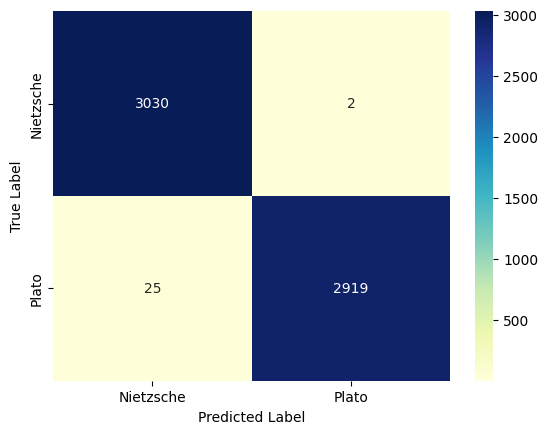

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=["Nietzsche", "Plato"], yticklabels=["Nietzsche", "Plato"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
def preprocess_input_text(text, sequence_length, char_to_index, alphabet_length):
    sequences = sliding_window(text, sequence_length)
    one_hot_encoded_sequences = []
    for seq in sequences:
        one_hot_encoded_seq = np.zeros((sequence_length, alphabet_length))
        for i, char in enumerate(seq):
            if char in char_to_index:
                one_hot_encoded_seq[i, char_to_index[char]] = 1
        one_hot_encoded_sequences.append(one_hot_encoded_seq)
    return np.stack(one_hot_encoded_sequences)
input_text = """
Be kind, for everyone you meet is fighting a harder battle. Be kind, for everyone you meet is fighting a harder battle."""
# Preprocess the input text
X_input = preprocess_input_text(input_text, sequence_length, char_to_index, alphabet_length)

# Get the predicted probabilities for the input text
y_probs = model.predict(X_input)

# Interpret the predicted probabilities to determine the author
author_probs = np.mean(y_probs, axis=0)
author = "Nietzsche" if author_probs < 0.5 else "Plato"
probability = 1- author_probs if author_probs < 0.5 else author_probs
print(f"The given text is most likely written by {author}, with probability {probability}.")


2/2 [==============================] - 0s 30ms/step
The given text is most likely written by Plato, with probability [0.99504256].
